# NoteBook for solving LGS #

In [1]:
# Initialisierung
import numpy as np
import sympy as sym
import scipy.linalg as sp

# eigene Funktionen
def eliminate(Aa_in, tolerance=np.finfo(float).eps*10., fix=False, verbos=0):
    # eliminates first row
    # assumes Aa is np.array, As.shape>(1,1)
    Aa = Aa_in
    Nn = len(Aa)
    # Mm = len(Aa[0,:])
    if (Nn < 2):
        return Aa
    else:
        if not fix:
            prof = np.argsort(np.abs(Aa_in[:, 0]))
            Aa = Aa[prof[::-1]]
        if np.abs(Aa[0, 0]) > tolerance:
            el = np.eye(Nn)
            el[0:Nn, 0] = -Aa[:, 0] / Aa[0, 0]
            el[0, 0] = 1.0 / Aa[0, 0]
            if (verbos > 50):
                print('Aa \n', Aa)
                print('el \n', el)
                print('pr \n', np.matmul(el, Aa))
            return np.matmul(el, Aa)
        else:
            return Aa


def FirstNonZero(lis):
    return next((i for i, x in enumerate(lis) if x), len(lis)-1)


def SortRows(Aa):
    inx = np.array(list(map(FirstNonZero, Aa)))
    #print('inx: ',inx,inx.argsort())
    return Aa[inx.argsort()]


def mrref(Aa_in, verbos=0):
    Aa = Aa_in*1.0
    Nn = len(Aa)
    kklist = np.arange(0, Nn - 1)
    #print('kklist', kklist)
    for kk in kklist:
        Aa[kk:, kk:] = eliminate(Aa[kk:, kk:], verbos=verbos-1)
    Aa = SortRows(Aa)
    Aa = np.flipud(Aa)
    # for kk in kklist:
    for kkh in kklist:
        kk = FirstNonZero(Aa[kkh, :])
        Aa[kkh::, kk::] = eliminate(Aa[kkh::, kk::], fix=True, verbos=verbos-1)
    return np.flipud(Aa)


def mnull(Aa_in,leps=np.finfo(float).eps*10,verbos=0):
    Aa=mrref(Aa_in) 
    Aa=Aa[list(map(np.linalg.norm,Aa  ))>leps] # extract non-zero linies
    mpiv=np.array(Aa[0]*0,dtype=bool)
    jj=0 # setup mask, indicating pivot-variables
    for ro in Aa>leps:
        for x in ro[jj:]:
            if x:
                mpiv[jj]=True
                jj=jj+1
                break
    
    jj=0 ; la=Aa[:,mpiv] ; veo=[]
    for jj in  np.argwhere(mpiv==False): 
        ve=np.linalg.lstsq(la, -Aa[:,jj],rcond=None)[0]
        vel=np.zeros((len(mpiv)))
        vel[mpiv]=ve[:,0] ; vel[jj]=1
        veo.append(vel)
 
    opt=np.array(veo).T
    if (verbos>10):
        print(Aa.shape,opt.shape)
        print('Test: ',np.matmul(Aa,opt))
    return opt 

# LGS_Lösen: (Eine Lösung)#

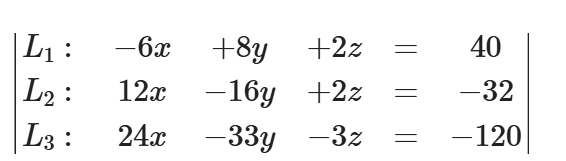

In [2]:
# In das Array A kommen die Werte von dem LGS. 

LGS_KOFF = np.array([[-6,8,2,40],
             [12,-16,2,-32],
             [24,-33,-3,-120]])

In [4]:
#Gauss Eliminieren
A1_G = mrref(LGS_KOFF)
print('Matrix nach GAUSS Elimination:\n', A1_G)
#Falls bei der Gauss eine Eye Matrix rauskommt gibt es keine Freie Varaiblen sondern alle sind Pivot.
# Bei diesem Fall gibt es genau eine Lösung nämlich die Werte nach dem Gauss. (-4,0,8)

Matrix nach GAUSS Elimination:
 [[ 1.  0.  0. -4.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  8.]]


# LGS_Lösen: (Mehrere Lösungen) #

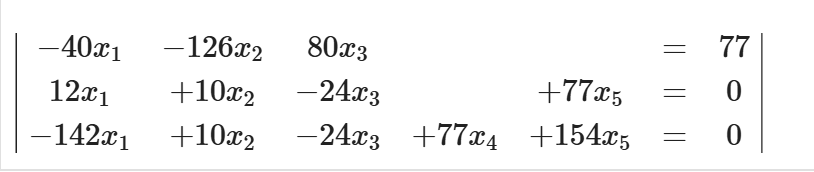

In [12]:
# In das Array A kommen die Werte von dem LGS. WICHTIG bei den Stellen wo keine Werte sind muss 0 eingesetzt werden

LGS_KOFF = np.array([[-40,-126,80,0,0,77],
             [12,10,-24,0,77,0],
             [-142,10,-24,77,154,0]])

In [15]:
#Gauss Eliminieren
A1_G = mrref(LGS_KOFF)
print('Matrix nach GAUSS Elimination:\n', A1_G)


Matrix nach GAUSS Elimination:
 [[ 1.          0.          0.         -0.5        -0.5         0.        ]
 [ 0.          1.          0.          0.         -2.76978417 -0.83093525]
 [ 0.          0.          1.         -0.25       -4.61241007 -0.34622302]]


In [ ]:
#Hier sehen wir dass wir Freie und Pivot Variablen haben.
#Pivot: x1, x2, x3 Freie: x4,x5
# Hier kann der Aufpunkt schnell gefunden werden indem x4 und x5 null gesetzt wird.
# Aufpunkt: (0,-0.83093525, -0.34622302, 0, 0)

In [17]:
# Als nächstes müssen die Richtungsvektoren bestummen werden.

print('Koeeffizientenmatrix:\n', LGS_KOFF[:,0:-1])

print('Richtungsvektoren:\n',mnull(LGS_KOFF[:,0:-1]).T) 
#Hier können die Richtungs vektoren entsprechend ausgelesen werden:

Koeeffizientenmatrix:
 [[ -40 -126   80    0    0]
 [  12   10  -24    0   77]
 [-142   10  -24   77  154]]
Richtungsvektoren:
 [[0.5        0.         0.25       1.         0.        ]
 [0.5        2.76978417 4.61241007 0.         1.        ]]


In [19]:
 ## Die Lösung wäre: (x1,x2,x3,x4,x5) = (0,-0.83093525, -0.34622302, 0, 0) + 
                                    #la* (0.5, 0, 0.25, 1, 0) + 
                                    #u* (0.5, 2.76978417, 4.61241007, 0, 1) ##